<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [118]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [119]:
#Dropping the rows with missing values in my response variable
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **Reading for 4th grade** 

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [120]:
#nunique gives the number of unique values as opposed to simply printing a list of unique values
df["YEAR"].nunique()

14

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [121]:
#Ohio has the higher avg outcome score by over 5 points
m = df[df["STATE"] == "MICHIGAN"]["AVG_READING_4_SCORE"].mean()
o = df[df["STATE"] == "OHIO"]["AVG_READING_4_SCORE"].mean()
print(m)
print(o)

217.83333333333334
223.1818181818182


Find the average for your outcome score across all states in 2019

In [122]:
df[df["YEAR"] == 2019]["AVG_READING_4_SCORE"].mean()

219.79245283018867

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [123]:
#The first line creates a dataframe which groups data by STATE, 
#and the second finds the highest avg reading score for 4th grade by state (from this new dataframe)
df_by_state = df.groupby("STATE")
df_by_state["AVG_READING_4_SCORE"].max()

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [124]:
#Creating two new features: Instruction expenditure per student and total revenue per student in a state
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL']
df['REV_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['ENROLL']

Feature selection justification: **I would like to see how the amount spent on instruction expenditure per student affects or is related to the avg reading score for 4th graders. Furthermore, I'd like to explore the effect of revenue per student (which may ultimately be related to tax structures) on the avg reading score for 4th graders**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

Text(0, 0.5, '4th grade reading score')

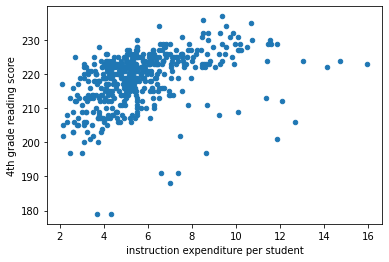

In [125]:
#Scatterplot to visualize the relationship between one feature and the response variable
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT',y='AVG_READING_4_SCORE')
plt.xlabel('instruction expenditure per student')
plt.ylabel('4th grade reading score')

**This scatterplot shows a moderate positive relationship between the instruction expenditure per student in a state and the avg 4th grade reading score in the state**

**Visualization 2**

Text(0, 0.5, '4th grade reading score')

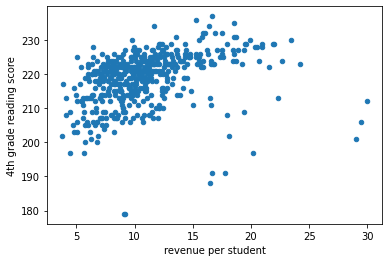

In [126]:
#Scatterplot to visualize the relationship between the second feature and the response variable
df.plot.scatter(x='REV_PER_STUDENT',y='AVG_READING_4_SCORE')
plt.xlabel('revenue per student')
plt.ylabel('4th grade reading score')

**This graph shows a moderate positive relationship between the total revenue per student in a state and the avg 4th grade reading score in the state**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
#Assigns the predictor and response variables to the model
# and drops the rows with missing values for the predictor variables (already been done for response in previous cell)

X = df[['REV_PER_STUDENT','INSTRUCTION_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.4, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **REGRESSION**

In [130]:
from sklearn.linear_model import LinearRegression


In [131]:
model = LinearRegression()

In [132]:
model.fit(X_train, y_train)

LinearRegression()

In [133]:
print(model.intercept_)
print(model.coef_)

211.94636739228034
[-1.69717947  4.42077698]


In [134]:
# R**2 value describes how well a linear model fits the data
#This means that around 24% of the variation on the response can be explained by the predictors in the model, 
#which is a fairly low R^2 value
model.score(X_test, y_test)

0.24775232774617117

In [135]:
# mean error
np.mean(model.predict(X_test)-y_test)

-0.400339841154507

In [136]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

5.7917862910371944

In [137]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

7.284112216481539

In [138]:
y_pred = model.predict(X_test)

# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

/Users/sunskriti/Documents/MDST/mdst_tutorials_W22/env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Reading 4 Score')

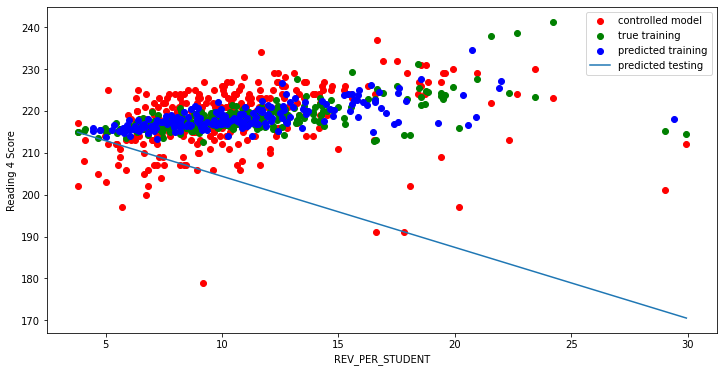

In [139]:
# This visualizes the results for the prediction power of REV_PER_STUDENT
# This does not show a good fit


col_name = 'REV_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 Score')

/Users/sunskriti/Documents/MDST/mdst_tutorials_W22/env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Reading 4 Score')

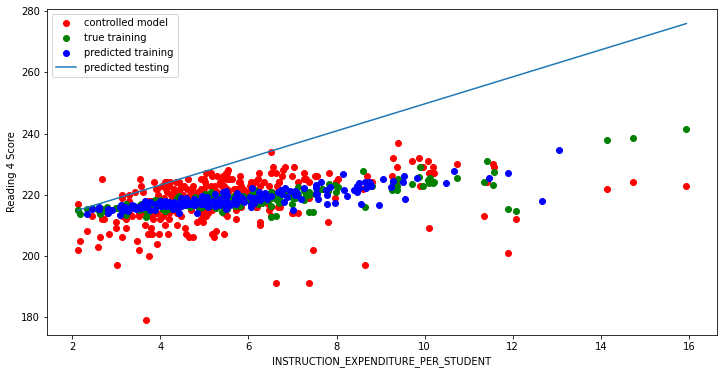

In [140]:
# This visualizes the results for the prediction power of TOTAL_EXPENDITURE_PER_STUDENT
# This shows a better fit than the previous graph

col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 Score')

<h2> Summary </h2>

**I chose to run a Linear Regression model using Instruction Expenditure and Revenue Data (per student) to predict the avg Reading score of 4th graders in a state. The model has an interecept of 211.9 points, with a coefficient of -1.7 for Revenue per student, and 4.4 for Instruction expenditure per student. This immediately seems questionable due to the expectation that an increase in revenue per student would increase the score, on an avg, but the model outputs a negative coefficient for the variable.
The model has an R^2 value of around 24%, which means that around 24% of the variation on the response can be explained by the predictors in the model, which is a fairly low R^2 value. Furthermore, it has a mean absoulte error of around 5.8 points of reading score between what the model predicts for the testing data and what the data actually shows for the reading score. It also has an RMSE of around 7.3 points, which is a fairly high value. Looking at the two visualizations for the individual predictors, it seems like the REV_PER_STUDENT variable is a poor predictor in the model while the INSTRUCTION_EXPENDITURE_PER_STUDENT variable displays a better fit.**